# Distribution
**Definition:**  
A **probability distribution** describes how the values of a random variable are distributed. 
# Objective learninig
**Identify** common continuous distributions:
   - Uniform, Gaussian (Normal), Exponential, Laplace, Beta, Generalized Gaussian, Gaussian Mixtur<br>
   
**Apply** continuous distributions in real-world scenarios:
   - Noise modeling (Gaussian, Laplace)  
   - Time-between-event modeling (Exponential)  
   - Probabilistic modeling (Beta, GMM)  
   - Feature distribution analysis in ML and signal proces

**Intuition:**  

Continuous distributions describe random variables that can take **any real value within a range**, allowing us to mathematically model natural and engineered processes with infinite possible outcomes.sing 

# Table of Content
-  [Probability Distributions](#PD)
 1. [Uniform Distribution](#'Uniform') 
 2. [Gaussian Distribution](#Gaussian)
 3. [Exponential Distribution](#Exponential)
 4. [Laplace Distribution](#Laplace)
 5. [Beta Distribution](#Beta)
 6. [Generalized Gaussian](#GGD)
 7. [Gaussian Mixture Models](#GMM)
- [Application](#AP)

## Probability Distributions<a name='PD'></a>
### 1.Uniform Distribution <a name='Uniform'></a>
**Definition:**  
A **Uniform Distribution** is a continuous distribution in which **all outcomes within an interval are equally likely**.

If a random variable \( X \) is uniformly distributed between \( a \) and \( b \):

$$
X \sim U(a, b)
$$

Then its **Probability Density Function (PDF)** is:

$$
f(x) =
\begin{cases}
\frac{1}{b - a}, & a \le x \le b \\
0, & \text{otherwise}
\end{cases}
$$

and the **Cumulative Distribution Function (CDF)** is:

$$
F(x) =
\begin{cases}
0, & x < a \\
\frac{x - a}{b - a}, & a \le x \le b \\
1, & x > b
\end{cases}
$$

---

### Properties
- Mean:  $E[X] = \dfrac{a + b}{2}$  
- Variance:  $\text{Var}(X) = \dfrac{(b - a)^2}{12}$  
- Used when all outcomes in an interval are equally probable  

---

### Intuition
Uniform distribution represents **complete uncertainty** — no value within the range is more likely than another.  
Example: A random real number between 0 and 1, or picking a point uniformly on a line.

---

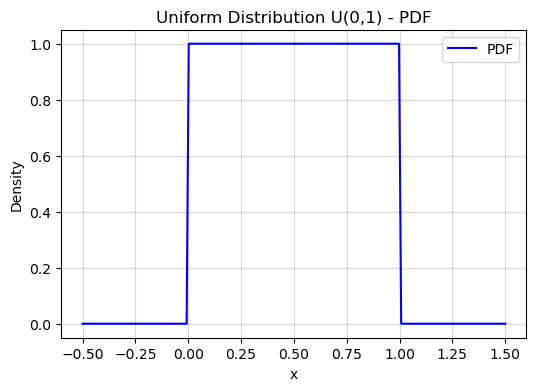

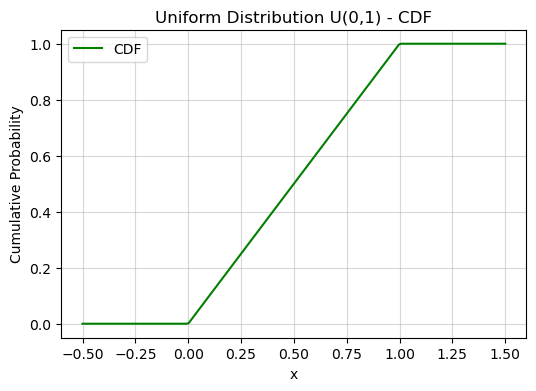

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Parameters
a, b = 0, 1

# Generate values
x = np.linspace(-0.5, 1.5, 200)
pdf = uniform.pdf(x, loc=a, scale=b - a)
cdf = uniform.cdf(x, loc=a, scale=b - a)

# Plot PDF
plt.figure(figsize=(6, 4))
plt.plot(x, pdf, label='PDF', color='blue')
plt.title("Uniform Distribution U(0,1) - PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('uniform.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Plot CDF
plt.figure(figsize=(6, 4))
plt.plot(x, cdf, label='CDF', color='green')
plt.title("Uniform Distribution U(0,1) - CDF")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

##  2. Gaussian (Normal) Distribution <a name='Gaussian'></a>
**Definition:**  
The **Gaussian** or **Normal Distribution** is the most important continuous probability distribution in statistics and machine learning.  
It models real-world data that cluster around a **mean (μ)** with **spread (σ²)**.

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

Its **Probability Density Function (PDF)** is:

$$
f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \, e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

and its **Cumulative Distribution Function (CDF)** is the integral of the PDF.

---

### Properties
- Mean:  $E[X] = \mu$  
- Variance:  $\text{Var}(X) = \sigma^2$  
- Symmetric around the mean  
- Total area under the curve = 1  

---

### Intuition
The Gaussian distribution appears **naturally** in many real-life processes (heights, weights, noise, errors).  
It’s central to statistics due to the **Central Limit Theorem (CLT)** — which states that the sum of many random variables tends toward a normal distribution.

---

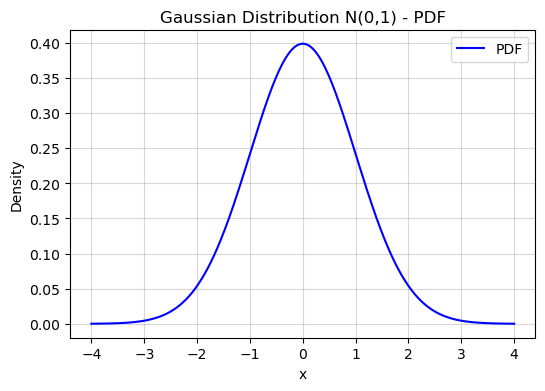

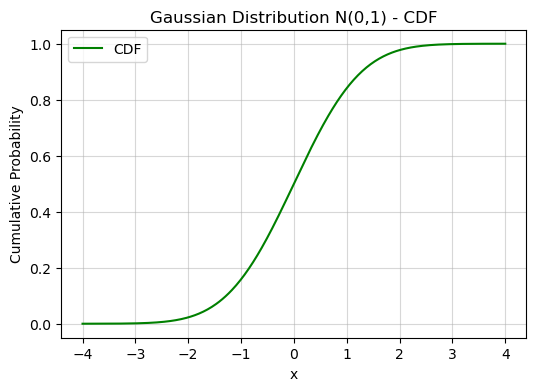

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu, sigma = 0, 1  # Standard normal

# Generate data
x = np.linspace(-4, 4, 400)
pdf = norm.pdf(x, mu, sigma)
cdf = norm.cdf(x, mu, sigma)

# Plot PDF
plt.figure(figsize=(6, 4))
plt.plot(x, pdf, color='blue', label='PDF')
plt.title("Gaussian Distribution N(0,1) - PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('Gaussian (Normal).jpg', dpi=300, bbox_inches='tight')
plt.show()

# Plot CDF
plt.figure(figsize=(6, 4))
plt.plot(x, cdf, color='green', label='CDF')
plt.title("Gaussian Distribution N(0,1) - CDF")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

## Laplace Distribution <a name='Laplace'></a>

**Definition:**  
The **Laplace Distribution** (also called the *double exponential distribution*) models data with **sharper peaks** and **heavier tails** than the normal distribution.  
It is defined by a **location parameter** $ \mu $ and a **scale parameter** \( b > 0 \).

$$
X \sim \text{Laplace}(\mu, b)
$$

The **Probability Density Function (PDF)** is:

$$
f(x \mid \mu, b) = \frac{1}{2b} \exp\left(-\frac{|x - \mu|}{b}\right)
$$

---

###  Properties
- Mean:  $E[X] = \mu$  
- Variance:  $\text{Var}(X) = 2b^2$  
- Symmetric about $ \mu $ 
- Heavier tails than Gaussian (useful for modeling outliers)

---

###  Intuition
The Laplace distribution is similar to a Gaussian but has a **sharper center** and **fatter tails**, meaning extreme values are more likely.  
It often appears in:
- Signal processing  
- Robust statistics  
- Machine learning (e.g., L1 regularization)

---


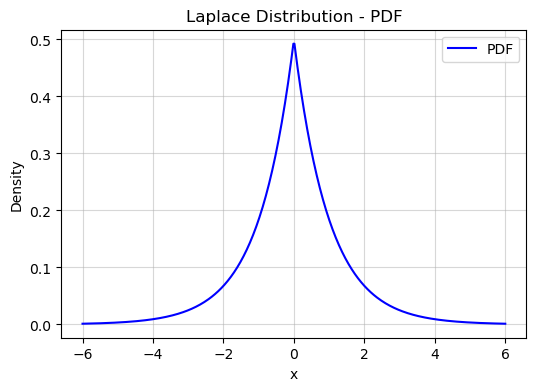

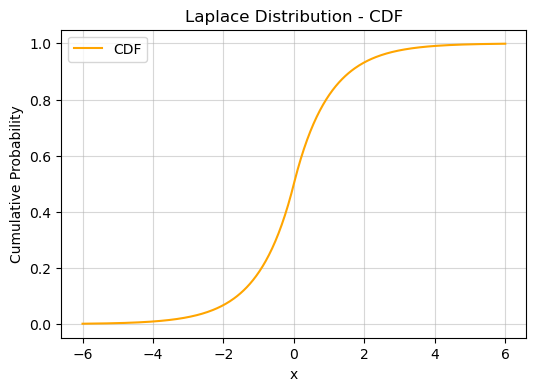

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace

# Parameters
mu, b = 0, 1

# Generate data
x = np.linspace(-6, 6, 400)
pdf = laplace.pdf(x, loc=mu, scale=b)
cdf = laplace.cdf(x, loc=mu, scale=b)

# Plot PDF
plt.figure(figsize=(6, 4))
plt.plot(x, pdf, label='PDF', color='blue')
plt.title("Laplace Distribution - PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('Laplace.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Plot CDF
plt.figure(figsize=(6, 4))
plt.plot(x, cdf, label='CDF', color='orange')
plt.title("Laplace Distribution - CDF")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

## Beta Distribution <a name='Beta'></a>

**Definition:**  
The **Beta Distribution** is a continuous probability distribution defined on the interval **[0, 1]**.  
It is parameterized by two positive shape parameters: $\alpha$ and $\beta$.

$$
X \sim \text{Beta}(\alpha, \beta)
$$

The **Probability Density Function (PDF)** is:

$$
f(x \mid \alpha, \beta) =
\frac{x^{\alpha - 1}(1 - x)^{\beta - 1}}{B(\alpha, \beta)}, \quad 0 \le x \le 1
$$

where $$B(\alpha, \beta)$$ is the **Beta function**, a normalization constant:

$$
B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$

---

###  Properties
- Mean:  $$E[X] = \dfrac{\alpha}{\alpha + \beta}$$  
- Variance:  $$\text{Var}(X) = \dfrac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$$  
- Domain:  $$0 \le X \le 1$$  

---

###  Intuition
The Beta distribution is extremely flexible — it can model many shapes depending on $\alpha$ and $\beta$.  
It’s widely used in:
- **Probabilities** (since values are between 0 and 1)  
- **Bayesian statistics** (as a conjugate prior for binomial distributions)  
- **Modeling proportions and rates**

---

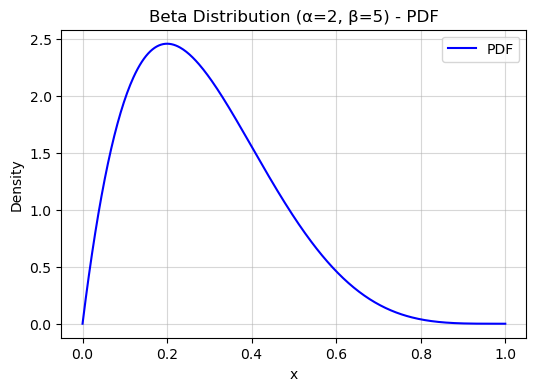

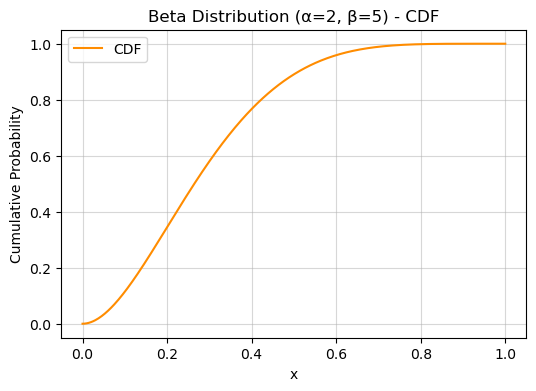

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
a, b = 2, 5  # Shape parameters

# Generate data
x = np.linspace(0, 1, 400)
pdf = beta.pdf(x, a, b)
cdf = beta.cdf(x, a, b)

# Plot PDF
plt.figure(figsize=(6, 4))
plt.plot(x, pdf, label='PDF', color='blue')
plt.title("Beta Distribution (α=2, β=5) - PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(alpha=0.5)
plt.legend()
plt.savefig('Beta.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Plot CDF
plt.figure(figsize=(6, 4))
plt.plot(x, cdf, label='CDF', color='darkorange')
plt.title("Beta Distribution (α=2, β=5) - CDF")
plt.xlabel("x")
plt.ylabel("Cumulative Probability")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

## 6.Generalized Gaussian Distribution <a name='GGD'></a>

**Definition:**  
The **Generalized Gaussian Distribution (GGD)** (also called the **Generalized Normal Distribution**) is a flexible family of distributions that includes both the **Gaussian** and **Laplace** distributions as special cases.  

It is defined by three parameters:  
- $ \mu $ → mean (location)  
- $ \alpha $ → scale  
- $ \beta $ → shape  

$ X \sim \text{GGD}(\mu, \alpha, \beta) $

The **Probability Density Function (PDF)** is:

$ f(x \mid \mu, \alpha, \beta) =
\frac{\beta}{2 \alpha \, \Gamma(1/\beta)}
\exp\left( -\left( \frac{|x - \mu|}{\alpha} \right)^{\beta} \right) $

---

###  Properties
- Mean:  $E[X] = \mu$  
- Variance:  $\text{Var}(X) = \alpha^2 \, \frac{\Gamma(3/\beta)}{\Gamma(1/\beta)}$  
- For $\beta = 2$ → **Gaussian distribution**  
- For $\beta = 1$ → **Laplace distribution**

---

###  Intuition
The **shape parameter** $ \beta $ controls the “peakedness” of the distribution:  
- $ \beta < 2 $ → heavy tails (Laplace-like)  
- $ \beta = 2 $ → Gaussian  
- $ \beta > 2 $ → lighter tails (more flat-topped)

GGD is widely used in:
- **Signal and image processing**  
- **Noise modeling**  
- **Feature compression and denoising**  

---

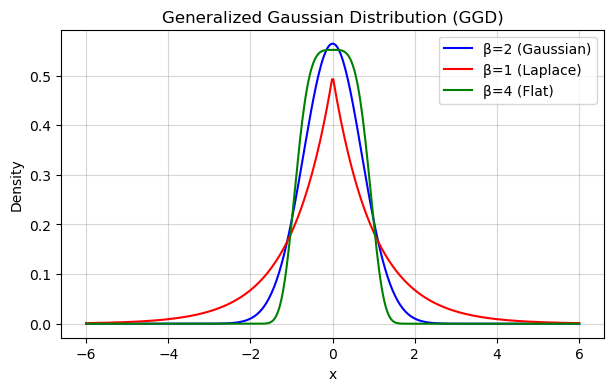

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

def generalized_gaussian_pdf(x, mu=0, alpha=1, beta=2):
    coeff = beta / (2 * alpha * gamma(1 / beta))
    return coeff * np.exp(- (np.abs(x - mu) / alpha) ** beta)

# Parameters
x = np.linspace(-6, 6, 400)
pdf_gaussian = generalized_gaussian_pdf(x, beta=2)   # Gaussian
pdf_laplace = generalized_gaussian_pdf(x, beta=1)    # Laplace
pdf_flat = generalized_gaussian_pdf(x, beta=4)       # Flatter shape

# Plot
plt.figure(figsize=(7, 4))
plt.plot(x, pdf_gaussian, label='β=2 (Gaussian)', color='blue')
plt.plot(x, pdf_laplace, label='β=1 (Laplace)', color='red')
plt.plot(x, pdf_flat, label='β=4 (Flat)', color='green')
plt.title("Generalized Gaussian Distribution (GGD)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('generalized_gaussian.jpg', dpi=300, bbox_inches='tight')
plt.show()


## 7.[Gaussian Mixture Models (GMM) <a name='GMM'></a>

**Definition:**  
A **Gaussian Mixture Model (GMM)** is a **probabilistic model** that represents a distribution as a **weighted sum of multiple Gaussian components**.  
It is useful for modeling data that come from multiple underlying groups or clusters.

The formula is:

$ p(x) = \sum_{k=1}^{K} \pi_k \, \mathcal{N}(x \mid \mu_k, \Sigma_k) $

Where:
- $K$ → number of Gaussian components  
- $\pi_k$ → weight (mixing coefficient), $\sum_k \pi_k = 1$  
- $\mathcal{N}(x \mid \mu_k, \Sigma_k)$ → Gaussian distribution with mean $\mu_k$ and covariance $\Sigma_k$

---

### 🔹 Key Concepts
- Each **component** represents a cluster.
- The **mixture weights ($\pi_k$)** represent the probability of belonging to each cluster.
- The **Expectation-Maximization (EM)** algorithm is used to estimate parameters:
  - **E-step:** Estimate probabilities (responsibilities) of each data point belonging to each Gaussian.  
  - **M-step:** Update $\mu_k$, $\Sigma_k$, and $\pi_k$ to maximize the likelihood.

---

C:\Users\Surface Laptop 3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


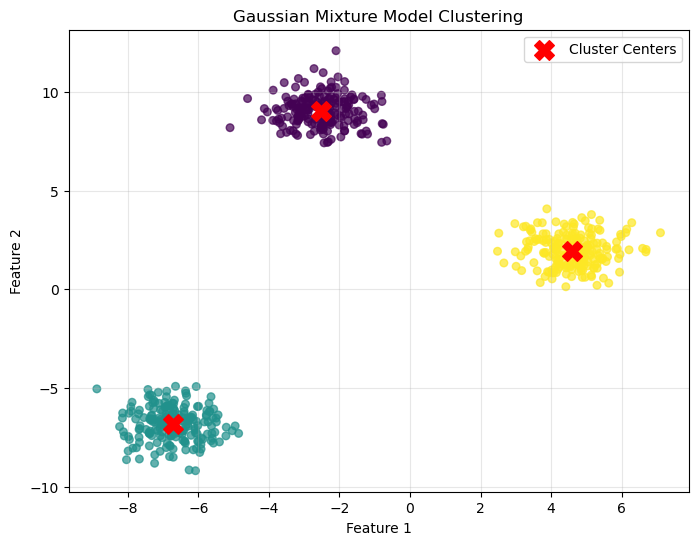

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import os

# Fix Windows MKL issue
os.environ["OMP_NUM_THREADS"] = "2"

# Generate synthetic 2D data (3 clusters)
X, y_true = make_blobs(n_samples=600, centers=3, cluster_std=0.8, random_state=42)

# Fit GMM model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)

# Predict cluster labels
y_gmm = gmm.predict(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=30, cmap='viridis', alpha=0.7)
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot Gaussian centers
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# Application<a name='AP'></a>
## 1. Uniform Distribution
- **Use Cases:**  
  - Modeling evenly distributed data or random sampling without bias.  
  - Example: Simulating random events, random allocation, or initialization in ML algorithms.  
- **In Data Analysis:**  
  - Used in Monte Carlo simulations.  
  - Common for initialization in K-Means, neural networks, and other optimization tasks.

---

## 2. Gaussian (Normal) Distribution
- **Use Cases:**  
  - Modeling continuous variables that cluster around a mean.  
  - Example: Height, weight, test scores, measurement errors.  
- **In Data Analysis:**  
  - Standardization / Z-score normalization.  
  - Basis for many models: Linear Regression, Logistic Regression, Naive Bayes, PCA.  
  - Assumptions in statistical tests: t-test, ANOVA.

---

## 3. Laplace Distribution
- **Use Cases:**  
  - Data with heavier tails or sharper peak than Gaussian.  
  - Example: Stock price changes, image noise.  
- **In Data Analysis:**  
  - Robust statistics and L1 regularization (Lasso).  
  - Handles outlier-prone data effectively.

---

## 4. Beta Distribution
- **Use Cases:**  
  - Modeling variables in [0,1] (proportions, probabilities).  
  - Example: Click-through rates (CTR), success/failure rates, percentages.  
- **In Data Analysis:**  
  - Common as Bayesian priors for binomial processes.  
  - Used in A/B testing and probability modeling.

---

## 5. Generalized Gaussian Distribution (GGD)
- **Use Cases:**  
  - Flexible distribution: data can be more peaked or flatter than Gaussian.  
  - Example: Wavelet coefficients in images, signal errors.  
- **In Data Analysis:**  
  - Noise modeling and feature extraction.  
  - Useful for regularization between L1 and L2 norms.

---

## 6. Gaussian Mixture Models (GMM)
- **Use Cases:**  
  - Modeling data that comes from multiple Gaussian sources.  
  - Example: Multi-group clustering, image segmentation, gene expression analysis.  
- **In Data Analysis:**  
  - Soft clustering: each point has probabilities for multiple clusters.  
  - Density estimation and anomaly detection.  
  - Core for many unsupervised learning tasks and complex dimensionality reduction.

---

## Summary Table

| Distribution | Use Case in Data Science |
|--------------|-------------------------|
| Uniform      | Simulation, random sampling, initialization |
| Gaussian     | Standardization, statistical modeling, PCA, regression |
| Laplace      | Robust modeling, L1 regularization, outlier-prone data |
| Beta         | Probabilities, percentages, Bayesian priors, A/B testing |
| GGD          | Noise modeling, feature extraction, compression |
| GMM          | Clustering, anomaly detection, density estimation, soft assignment |
